# 메모   
- 주요 축제를 개최하는 바닷가 근처에 대형아울렛   
- 초당두부 축제를 겨울에 개최
- 한과마을을 활용한 환과 축제
- 버스,기차 데이터?

In [ ]:
# colab 드라이브 마운트
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
import matplotlib as mpl  # 기본 설정
import matplotlib.pyplot as plt  # 그래프 그리기
import matplotlib.font_manager as fm  # 폰트 관리


!apt-get update -qq         # apt-get 패키지 설치 명령어, -qq : 에러외 메세지 숨기기
!apt-get install fonts-nanum* -qq #나눔글꼴 설치

fe = fm.FontEntry(fname=r'/usr/share/fonts/truetype/nanum/NanumGothic.ttf', name='NanumGothic') #파일 저장되어있는 경로와 이름 설정
fm.fontManager.ttflist.insert(0, fe)  # Matplotlib에 폰트 추가
plt.rcParams.update({'font.size': 10, 'font.family': 'NanumGothic'}) #폰트설정

In [ ]:
# 라이브러리 읽어오기

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os

In [ ]:
data = pd.read_csv("/content/gdrive/MyDrive/23년 여름ai아카데미/1801_22.05강릉관광데이터_최종.csv")

In [ ]:
df = pd.DataFrame(data=data)

In [ ]:
df.head()

,기준연월,지역명,방문자 수,숙박방문자 수,신용카드 소비액(천원),식음료업(천원),쇼핑업(천원),숙박업(천원),여가서비스업(천원),운송업(천원),...,목적지 유형 검색량(자연관광),목적지 유형 검색량(문화관광),목적지 유형 검색량(역사관광),목적지 유형 검색량(체험관광),목적지 유형 검색량(레저스포츠),여행유형/트렌드별 검색량(레포츠),여행유형/트렌드별 검색량(휴식/힐링),여행유형/트렌드별 검색량(체험),여행유형/트렌드별 검색량(미식),여행유형/트렌드별 검색량(기타)
0,2018년01월,강원도 강릉시,2467762,414591,14220150,9347520,299159,1414465,431930,28775,...,36043,28039,1182,1116,8662,6739,2945,919,628,1395
1,2018년02월,강원도 강릉시,3100165,484107,13567573,9374136,2730917,1074072,356156,30733,...,22875,24202,1049,613,28391,9635,3000,714,546,1486
2,2018년03월,강원도 강릉시,2640196,419178,14881446,9497487,3328785,1398589,629109,23683,...,30260,21217,1829,1093,12009,5668,2362,388,523,905
3,2018년04월,강원도 강릉시,2240230,382550,14984917,9645479,3111638,1472622,707700,33383,...,56415,20613,11574,1548,9276,2448,2216,590,544,798
4,2018년05월,강원도 강릉시,2594365,473350,16381068,10502482,3310698,1718209,796171,48476,...,74911,29191,14994,3277,12386,3934,2674,481,694,784


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 65 entries, 0 to 64
Data columns (total 40 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   기준연월                  65 non-null     object
 1   지역명                   65 non-null     object
 2   방문자 수                 65 non-null     int64 
 3   숙박방문자 수               65 non-null     int64 
 4   신용카드 소비액(천원)          65 non-null     int64 
 5   식음료업(천원)              65 non-null     int64 
 6   쇼핑업(천원)               65 non-null     int64 
 7   숙박업(천원)               65 non-null     int64 
 8   여가서비스업(천원)            65 non-null     int64 
 9   운송업(천원)               65 non-null     int64 
 10  여행업(천원)               65 non-null     int64 
 11  무박                    65 non-null     int64 
 12  1박                    65 non-null     int64 
 13  2박                    65 non-null     int64 
 14  3박이상                  65 non-null     int64 
 15  평균 체류시간(분)            65 non-null     int6

In [ ]:
df = df.drop(columns = ['지역명'])
df.head()

,기준연월,방문자 수,숙박방문자 수,신용카드 소비액(천원),식음료업(천원),쇼핑업(천원),숙박업(천원),여가서비스업(천원),운송업(천원),여행업(천원),...,목적지 유형 검색량(자연관광),목적지 유형 검색량(문화관광),목적지 유형 검색량(역사관광),목적지 유형 검색량(체험관광),목적지 유형 검색량(레저스포츠),여행유형/트렌드별 검색량(레포츠),여행유형/트렌드별 검색량(휴식/힐링),여행유형/트렌드별 검색량(체험),여행유형/트렌드별 검색량(미식),여행유형/트렌드별 검색량(기타)
0,2018년01월,2467762,414591,14220150,9347520,299159,1414465,431930,28775,5872,...,36043,28039,1182,1116,8662,6739,2945,919,628,1395
1,2018년02월,3100165,484107,13567573,9374136,2730917,1074072,356156,30733,1559,...,22875,24202,1049,613,28391,9635,3000,714,546,1486
2,2018년03월,2640196,419178,14881446,9497487,3328785,1398589,629109,23683,3792,...,30260,21217,1829,1093,12009,5668,2362,388,523,905
3,2018년04월,2240230,382550,14984917,9645479,3111638,1472622,707700,33383,14095,...,56415,20613,11574,1548,9276,2448,2216,590,544,798
4,2018년05월,2594365,473350,16381068,10502482,3310698,1718209,796171,48476,5032,...,74911,29191,14994,3277,12386,3934,2674,481,694,784


In [ ]:
df.columns = df.columns.str.replace(' ','')

In [ ]:
plt.rcParams["axes.grid"] = False #fig,ax를 같이 쓰면 그리드가 한곳에라도 써지면 통일된다. 그래서 그리드 디폴드 값을 false로 고정해줬다.

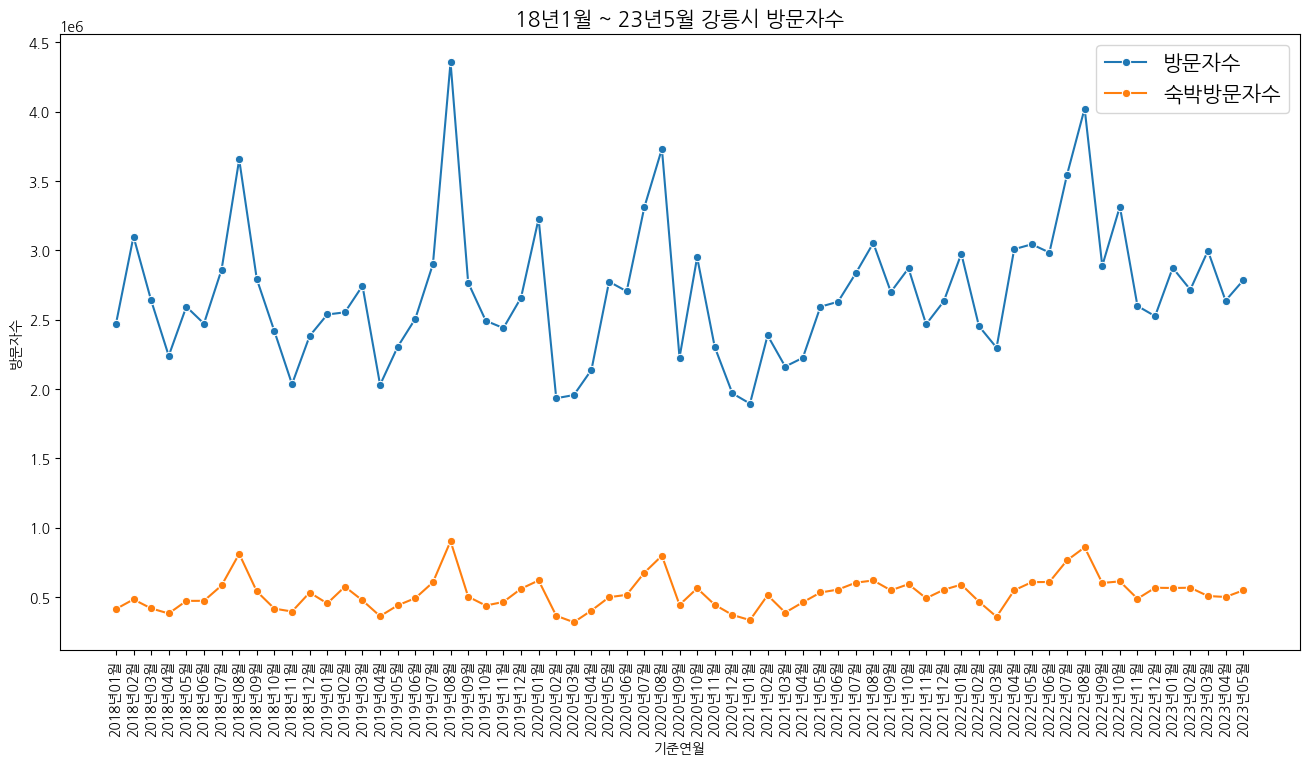

In [ ]:
# 그래프를 그릴 도화지 준비하기
fig, ax = plt.subplots(1,1,figsize=(16, 8))
ax= sns.lineplot(x='기준연월', y='방문자수', data=df, marker='o', label='방문자수')
ax= sns.lineplot(x='기준연월', y='숙박방문자수', data=df, marker='o', label='숙박방문자수')
plt.title("18년1월 ~ 23년5월 강릉시 방문자수", fontsize=15)
plt.xticks(rotation=90)
plt.legend(fontsize=15)
plt.show()

In [ ]:
총방문자수 = df['방문자수'].sum()
총숙박방문자수 = df['숙박방문자수'].sum()
숙박방문자수퍼센 =(총숙박방문자수/총방문자수)*100
당일방문자수퍼센 = ((총방문자수-총숙박방문자수)/총방문자수)*100

In [ ]:
size = [당일방문자수퍼센, 숙박방문자수퍼센]
labels = ['당일방문자수', '숙박시설이용방문자수']
colors = ['cyan', 'blue']
explode = [0.1, 0]

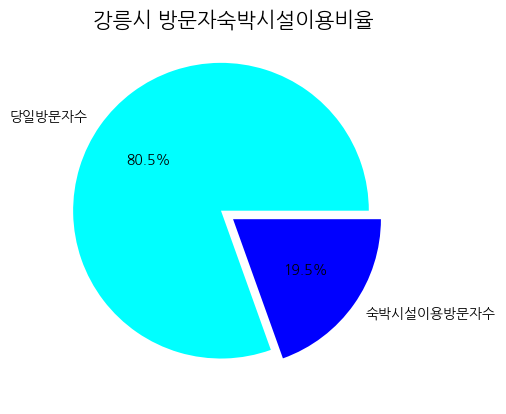

In [ ]:
plt.pie(size, labels=labels, colors=colors, explode=explode, autopct='%1.1f%%')
plt.title('강릉시 방문자숙박시설이용비율',fontsize = 15)
plt.show()

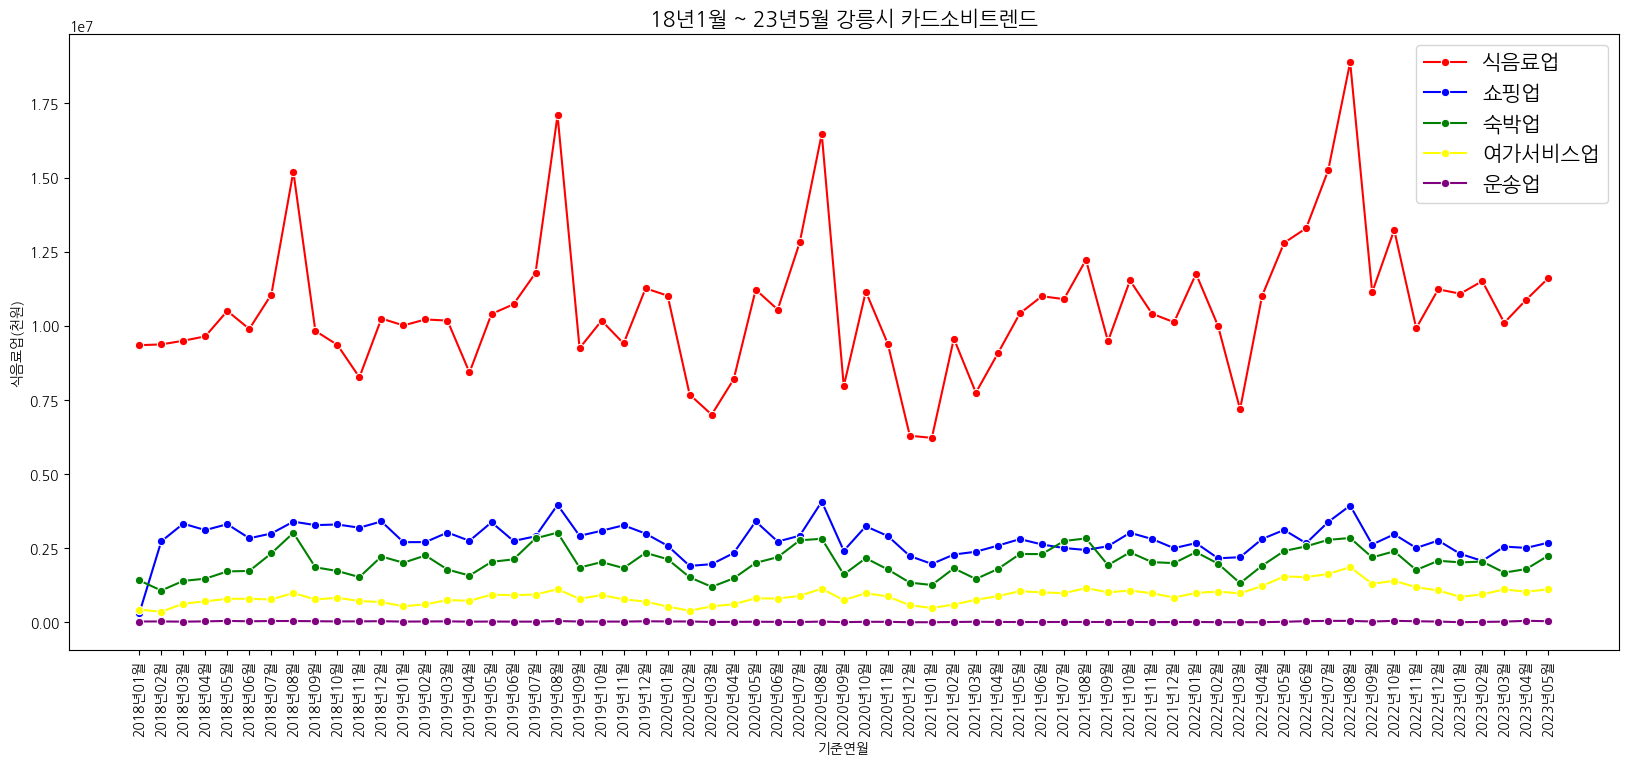

In [ ]:
fig, ax = plt.subplots(1,1, figsize=(20,8))
ax= sns.lineplot(x='기준연월', y='식음료업(천원)', data=df, color='red',  marker='o', label='식음료업')
ax= sns.lineplot(x='기준연월', y='쇼핑업(천원)', data=df, color='blue',  marker='o', label='쇼핑업')
ax= sns.lineplot(x='기준연월', y='숙박업(천원)', data=df, color='green',  marker='o', label='숙박업')
ax= sns.lineplot(x='기준연월', y='여가서비스업(천원)', data=df, color='yellow',  marker='o', label='여가서비스업')
ax= sns.lineplot(x='기준연월', y='운송업(천원)', data=df, color='purple',  marker='o', label='운송업')
plt.title('18년1월 ~ 23년5월 강릉시 카드소비트렌드', fontsize=15)
plt.legend(fontsize=15)
plt.xticks(rotation=90)
plt.show()

In [ ]:
식음료업 = df['식음료업(천원)'].sum()
쇼핑업 = df['쇼핑업(천원)'].sum()
숙박업 = df['숙박업(천원)'].sum()
여가서비스업 = df['여가서비스업(천원)'].sum()
운송업 = df['운송업(천원)'].sum()

In [ ]:
value = [식음료업, 쇼핑업, 숙박업, 여가서비스업, 운송업]
x_label = ['식음료업', '쇼핑업', '숙박업', '여가서비스업', '운송업']


Text(0.5, 1.0, '강릉시 신용카드소비총액비율')

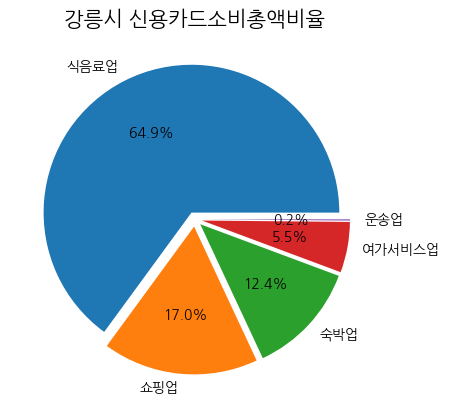

In [ ]:
plt.pie(value, labels=x_label,autopct='%1.1f%%',explode=[0.05,0.05,0.05,0.05,0.05])
plt.title('강릉시 신용카드소비총액비율', fontsize=15)

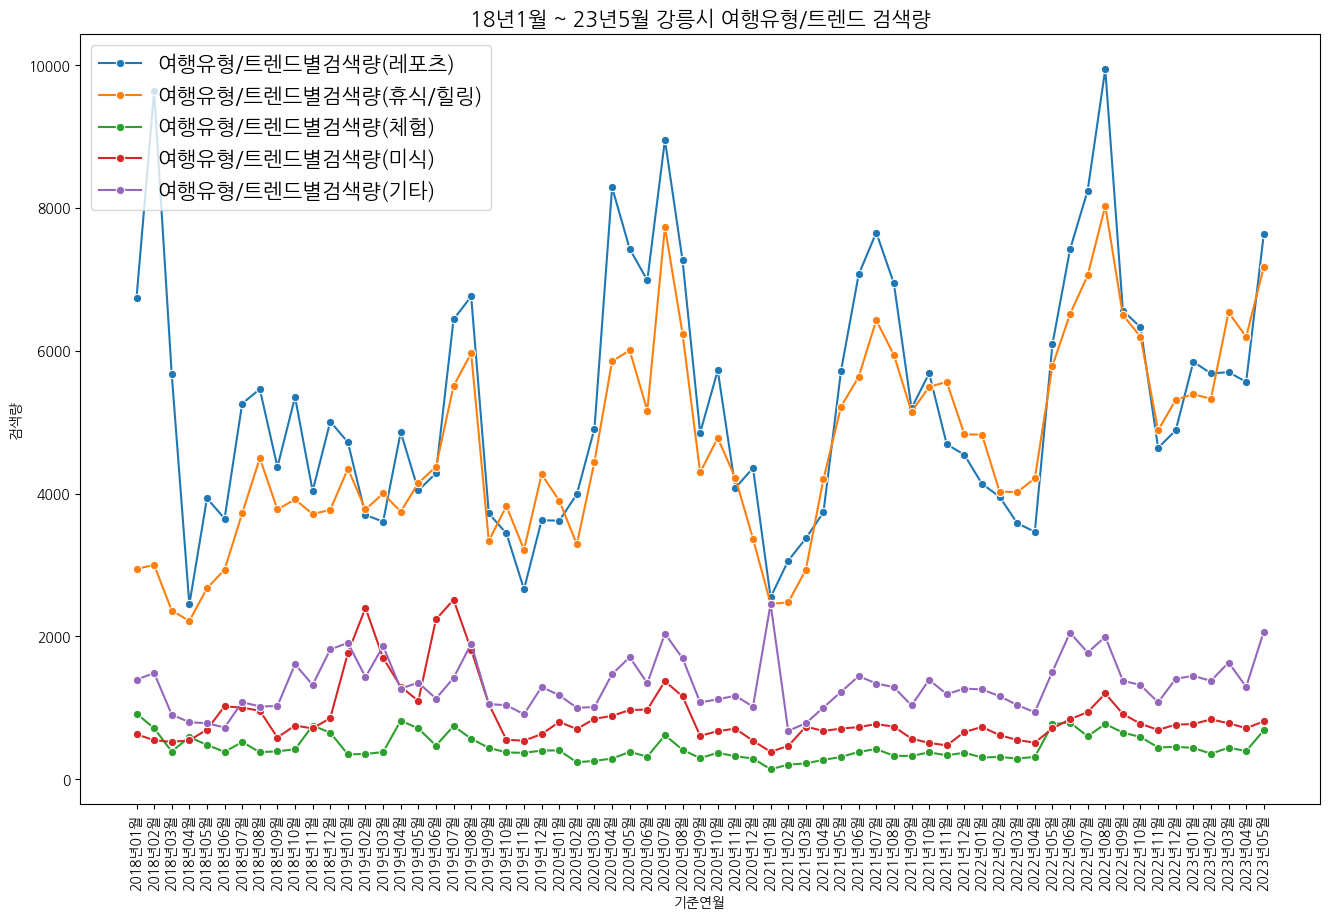

In [ ]:
fig, ax = plt.subplots(1,1, figsize=(16,10))

ax = sns.lineplot(x='기준연월', y='여행유형/트렌드별검색량(레포츠)', data=df, marker='o', label='여행유형/트렌드별검색량(레포츠)')
ax = sns.lineplot(x='기준연월', y='여행유형/트렌드별검색량(휴식/힐링)', data=df, marker='o', label='여행유형/트렌드별검색량(휴식/힐링)')
ax = sns.lineplot(x='기준연월', y='여행유형/트렌드별검색량(체험)', data=df, marker='o', label='여행유형/트렌드별검색량(체험)')
ax = sns.lineplot(x='기준연월', y='여행유형/트렌드별검색량(미식)', data=df, marker='o', label='여행유형/트렌드별검색량(미식)')
ax = sns.lineplot(x='기준연월', y='여행유형/트렌드별검색량(기타)', data=df, marker='o', label='여행유형/트렌드별검색량(기타)')
plt.xticks(rotation=90)
plt.ylabel('검색량')
plt.legend(fontsize=15)
plt.title('18년1월 ~ 23년5월 강릉시 여행유형/트렌드 검색량', fontsize=15)
plt.show()

In [ ]:
트렌드레포츠 = df['여행유형/트렌드별검색량(레포츠)'].sum
트렌드휴식 = df['여행유형/트렌드별검색량(휴식/힐링)'].sum
트렌드체험 = df['여행유형/트렌드별검색량(체험)'].sum
트렌드미식 = df['여행유형/트렌드별검색량(미식)'].sum
트렌드기타 = df['여행유형/트렌드별검색량(기타)'].sum

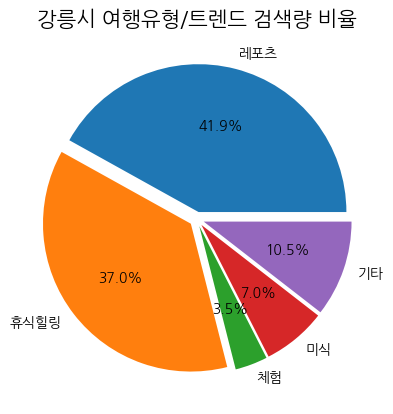

In [ ]:
value2 = [트렌드레포츠(), 트렌드휴식(), 트렌드체험(), 트렌드미식(), 트렌드기타()]
label2 = ['레포츠', '휴식힐링', '체험', '미식', '기타']

plt.pie(value2, labels=label2, autopct='%1.1f%%', explode=[0.05,0.05,0.05,0.05,0.05])
plt.title('강릉시 여행유형/트렌드 검색량 비율', fontsize=15)
plt.show()

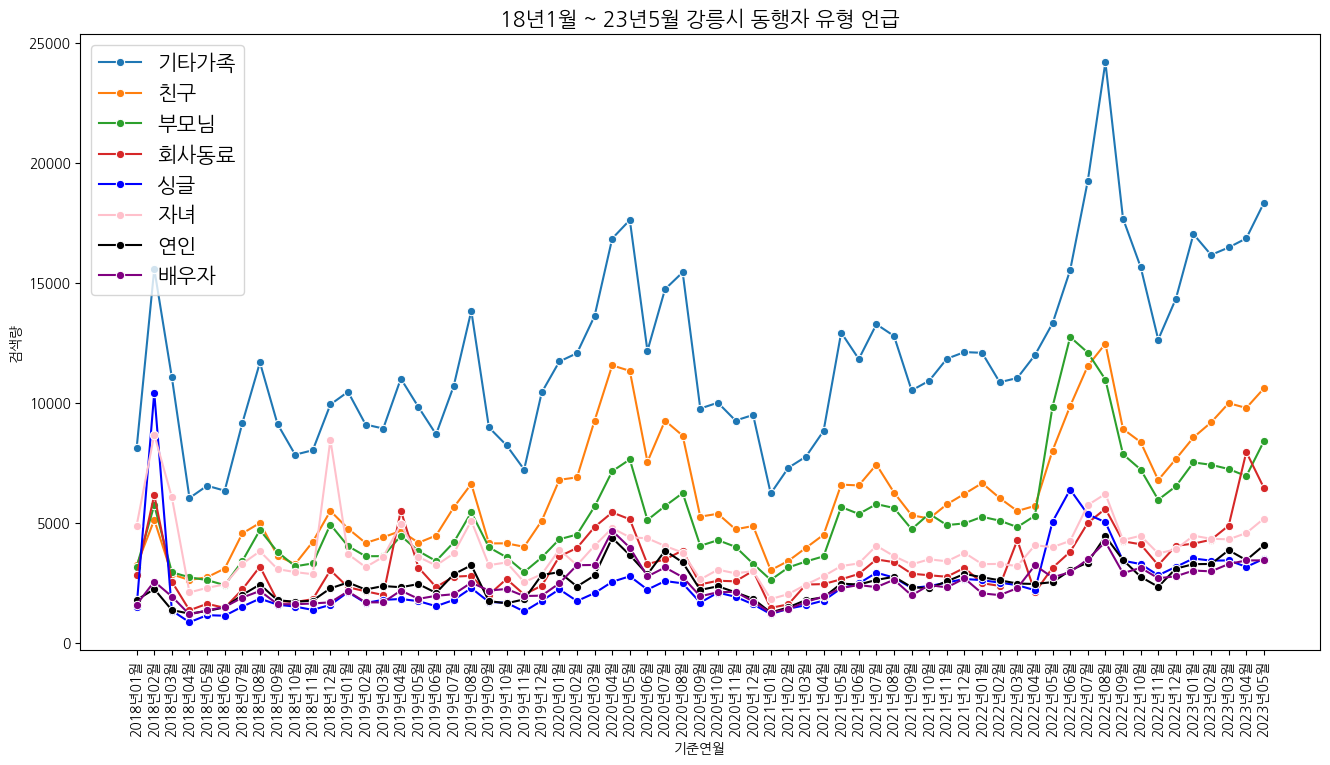

In [ ]:
fig, ax = plt.subplots(1,1,figsize=(16,8))

ax= sns.lineplot(x='기준연월', y='동행자유형언급(기타가족)', data=df, marker='o', label='기타가족')
ax= sns.lineplot(x='기준연월', y='동행자유형언급(친구)', data=df, marker='o', label='친구')
ax= sns.lineplot(x='기준연월', y='동행자유형언급(부모님)', data=df, marker='o', label='부모님')
ax= sns.lineplot(x='기준연월', y='동행자유형언급(회사동료)', data=df, marker='o', label='회사동료')
ax= sns.lineplot(x='기준연월', y='동행자유형언급(싱글)', data=df, marker='o', label='싱글', color='blue')
ax= sns.lineplot(x='기준연월', y='동행자유형언급(자녀)', data=df, marker='o', label='자녀', color='pink')
ax= sns.lineplot(x='기준연월', y='동행자유형언급(연인)', data=df, marker='o', label='연인', color='black')
ax= sns.lineplot(x='기준연월', y='동행자유형언급(배우자)', data=df, marker='o', label='배우자', color='purple')
plt.xticks(rotation=90)
plt.legend(fontsize=15)
plt.title('18년1월 ~ 23년5월 강릉시 동행자 유형 언급', fontsize=15)
plt.ylabel('검색량')
plt.show()

In [ ]:
기타가족=df['동행자유형언급(기타가족)'].sum()
친구=df['동행자유형언급(친구)'].sum()
부모님=df['동행자유형언급(부모님)'].sum()
회사동료=df['동행자유형언급(회사동료)'].sum()
싱글=df['동행자유형언급(싱글)'].sum()
자녀=df['동행자유형언급(자녀)'].sum()
연인=df['동행자유형언급(연인)'].sum()
배우자=df['동행자유형언급(배우자)'].sum()

In [ ]:
value3=[기타가족, 친구, 부모님, 회사동료, 싱글, 자녀, 연인, 배우자]
labels3=['기타가족','친구','부모님','회사동료', '싱글', '자녀', '연인', '배우자']

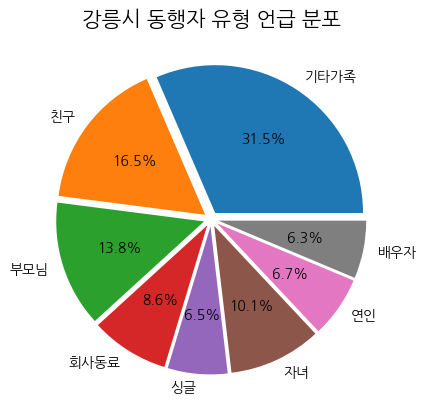

In [ ]:
plt.pie(value3, labels=labels3, autopct='%1.1f%%', explode=[0.05,0.05,0.05, 0.05, 0.05,0.05,0.05,0.05,])
plt.title('강릉시 동행자 유형 언급 분포', fontsize=15)
plt.show()


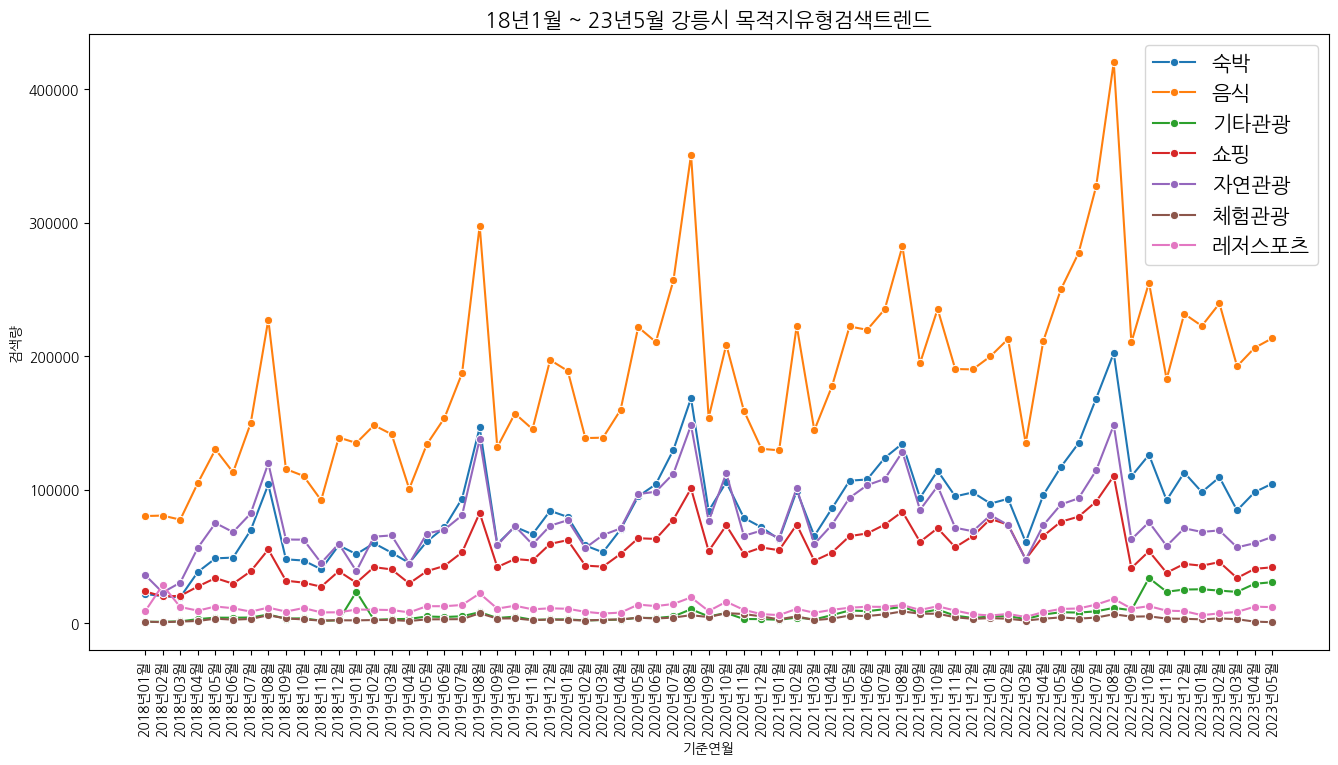

In [ ]:
fig, ax = plt.subplots(1,1, figsize=(16,8))

ax= sns.lineplot(x='기준연월', y='목적지유형검색량(숙박)', data=df, marker='o', label='숙박')
ax= sns.lineplot(x='기준연월', y='목적지유형검색량(음식)', data=df, marker='o', label='음식')
ax= sns.lineplot(x='기준연월', y='목적지유형검색량(기타관광)', data=df, marker='o', label='기타관광')
ax= sns.lineplot(x='기준연월', y='목적지유형검색량(쇼핑)', data=df, marker='o', label='쇼핑')
ax= sns.lineplot(x='기준연월', y='목적지유형검색량(자연관광)', data=df, marker='o', label='자연관광')
ax= sns.lineplot(x='기준연월', y='목적지유형검색량(체험관광)', data=df, marker='o', label='체험관광')
ax= sns.lineplot(x='기준연월', y='목적지유형검색량(레저스포츠)', data=df, marker='o', label='레저스포츠')
plt.xticks(rotation=90)
plt.title('18년1월 ~ 23년5월 강릉시 목적지유형검색트렌드', fontsize=15)
plt.ylabel('검색량')
plt.legend(fontsize=15)
plt.show()

In [ ]:
목적지숙박 = df['목적지유형검색량(숙박)'].sum()
목적지음식 = df['목적지유형검색량(음식)'].sum()
목적지기타관광 = df['목적지유형검색량(기타관광)'].sum()
목적지쇼핑 = df['목적지유형검색량(쇼핑)'].sum()
목적지자연관광 = df['목적지유형검색량(자연관광)'].sum()
목적지체험관광 = df['목적지유형검색량(체험관광)'].sum()
목적지레저스포츠 = df['목적지유형검색량(레저스포츠)'].sum()

In [ ]:
value4=[목적지숙박, 목적지음식, 목적지기타관광, 목적지쇼핑, 목적지자연관광, 목적지체험관광, 목적지레저스포츠]
labels4=['숙박','음식','기타관광','쇼핑','자연관광','체험관광','레저스포츠']

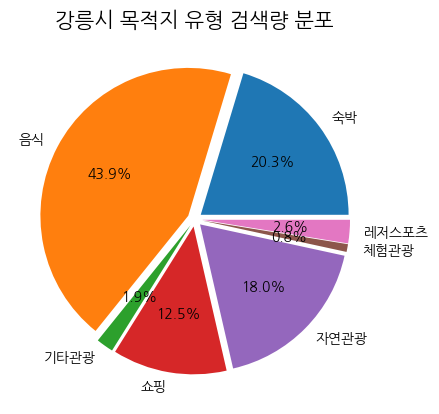

In [ ]:
plt.pie(value4, labels=labels4, autopct='%1.1f%%', explode=[0.05,0.05,0.05,0.05,0.05,0.05,0.05,])
plt.title('강릉시 목적지 유형 검색량 분포', fontsize=15)
plt.show()

In [ ]:
df_corr = df.corr(method='pearson')
df_corr

<ipython-input-47-783b2cb505e5>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df_corr = df.corr(method='pearson')


,방문자수,숙박방문자수,신용카드소비액(천원),식음료업(천원),쇼핑업(천원),숙박업(천원),여가서비스업(천원),운송업(천원),여행업(천원),무박,...,목적지유형검색량(자연관광),목적지유형검색량(문화관광),목적지유형검색량(역사관광),목적지유형검색량(체험관광),목적지유형검색량(레저스포츠),여행유형/트렌드별검색량(레포츠),여행유형/트렌드별검색량(휴식/힐링),여행유형/트렌드별검색량(체험),여행유형/트렌드별검색량(미식),여행유형/트렌드별검색량(기타)
방문자수,1.000000,0.934552,0.895857,0.916483,0.517926,0.760627,0.601066,0.402771,-0.086504,0.170478,...,0.665635,0.510516,0.526618,0.460098,0.627356,0.570865,0.589636,0.315191,0.264054,0.353697
숙박방문자수,0.934552,1.000000,0.928033,0.940137,0.517701,0.888466,0.632739,0.361591,-0.153191,0.146018,...,0.778001,0.500847,0.610475,0.556405,0.522126,0.527014,0.638255,0.270010,0.305418,0.347493
신용카드소비액(천원),0.895857,0.928033,1.000000,0.990186,0.634042,0.871569,0.730408,0.480717,-0.001947,0.101563,...,0.747121,0.520703,0.642688,0.483211,0.556373,0.524702,0.637225,0.406165,0.317552,0.362853
식음료업(천원),0.916483,0.940137,0.990186,1.000000,0.579236,0.857014,0.709892,0.466893,-0.024950,0.087202,...,0.744317,0.563519,0.642764,0.465723,0.565399,0.555883,0.652226,0.391321,0.310708,0.387239
쇼핑업(천원),0.517926,0.517701,0.634042,0.579236,1.000000,0.479096,0.396378,0.432752,0.101185,0.183850,...,0.437634,0.066539,0.362266,0.285015,0.505000,0.148117,0.227974,0.175179,0.232302,0.147442
숙박업(천원),0.760627,0.888466,0.871569,0.857014,0.479096,1.000000,0.631496,0.256389,-0.147068,0.058627,...,0.793681,0.429185,0.637823,0.581200,0.376271,0.445923,0.667607,0.248041,0.396415,0.351375
여가서비스업(천원),0.601066,0.632739,0.730408,0.709892,0.396378,0.631496,1.000000,0.236127,-0.161110,0.029338,...,0.565922,0.661021,0.801441,0.478150,0.202814,0.408916,0.729843,0.312357,0.031602,0.260200
운송업(천원),0.402771,0.361591,0.480717,0.466893,0.432752,0.256389,0.236127,1.000000,0.292981,0.187269,...,0.043610,0.290834,0.085887,-0.175846,0.368434,0.174618,0.096066,0.500005,0.238814,0.143734
여행업(천원),-0.086504,-0.153191,-0.001947,-0.024950,0.101185,-0.147068,-0.161110,0.292981,1.000000,0.011284,...,-0.162722,-0.235491,-0.216308,-0.241858,0.046069,-0.170761,-0.370976,0.238640,0.044240,-0.244170
무박,0.170478,0.146018,0.101563,0.087202,0.183850,0.058627,0.029338,0.187269,0.011284,1.000000,...,0.023259,-0.029864,-0.023333,0.051723,0.021887,0.017906,0.001637,0.007692,-0.047458,-0.049921


/usr/local/lib/python3.10/dist-packages/seaborn/utils.py:80: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.draw()


<Axes: >

/usr/local/lib/python3.10/dist-packages/IPython/core/events.py:89: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  func(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


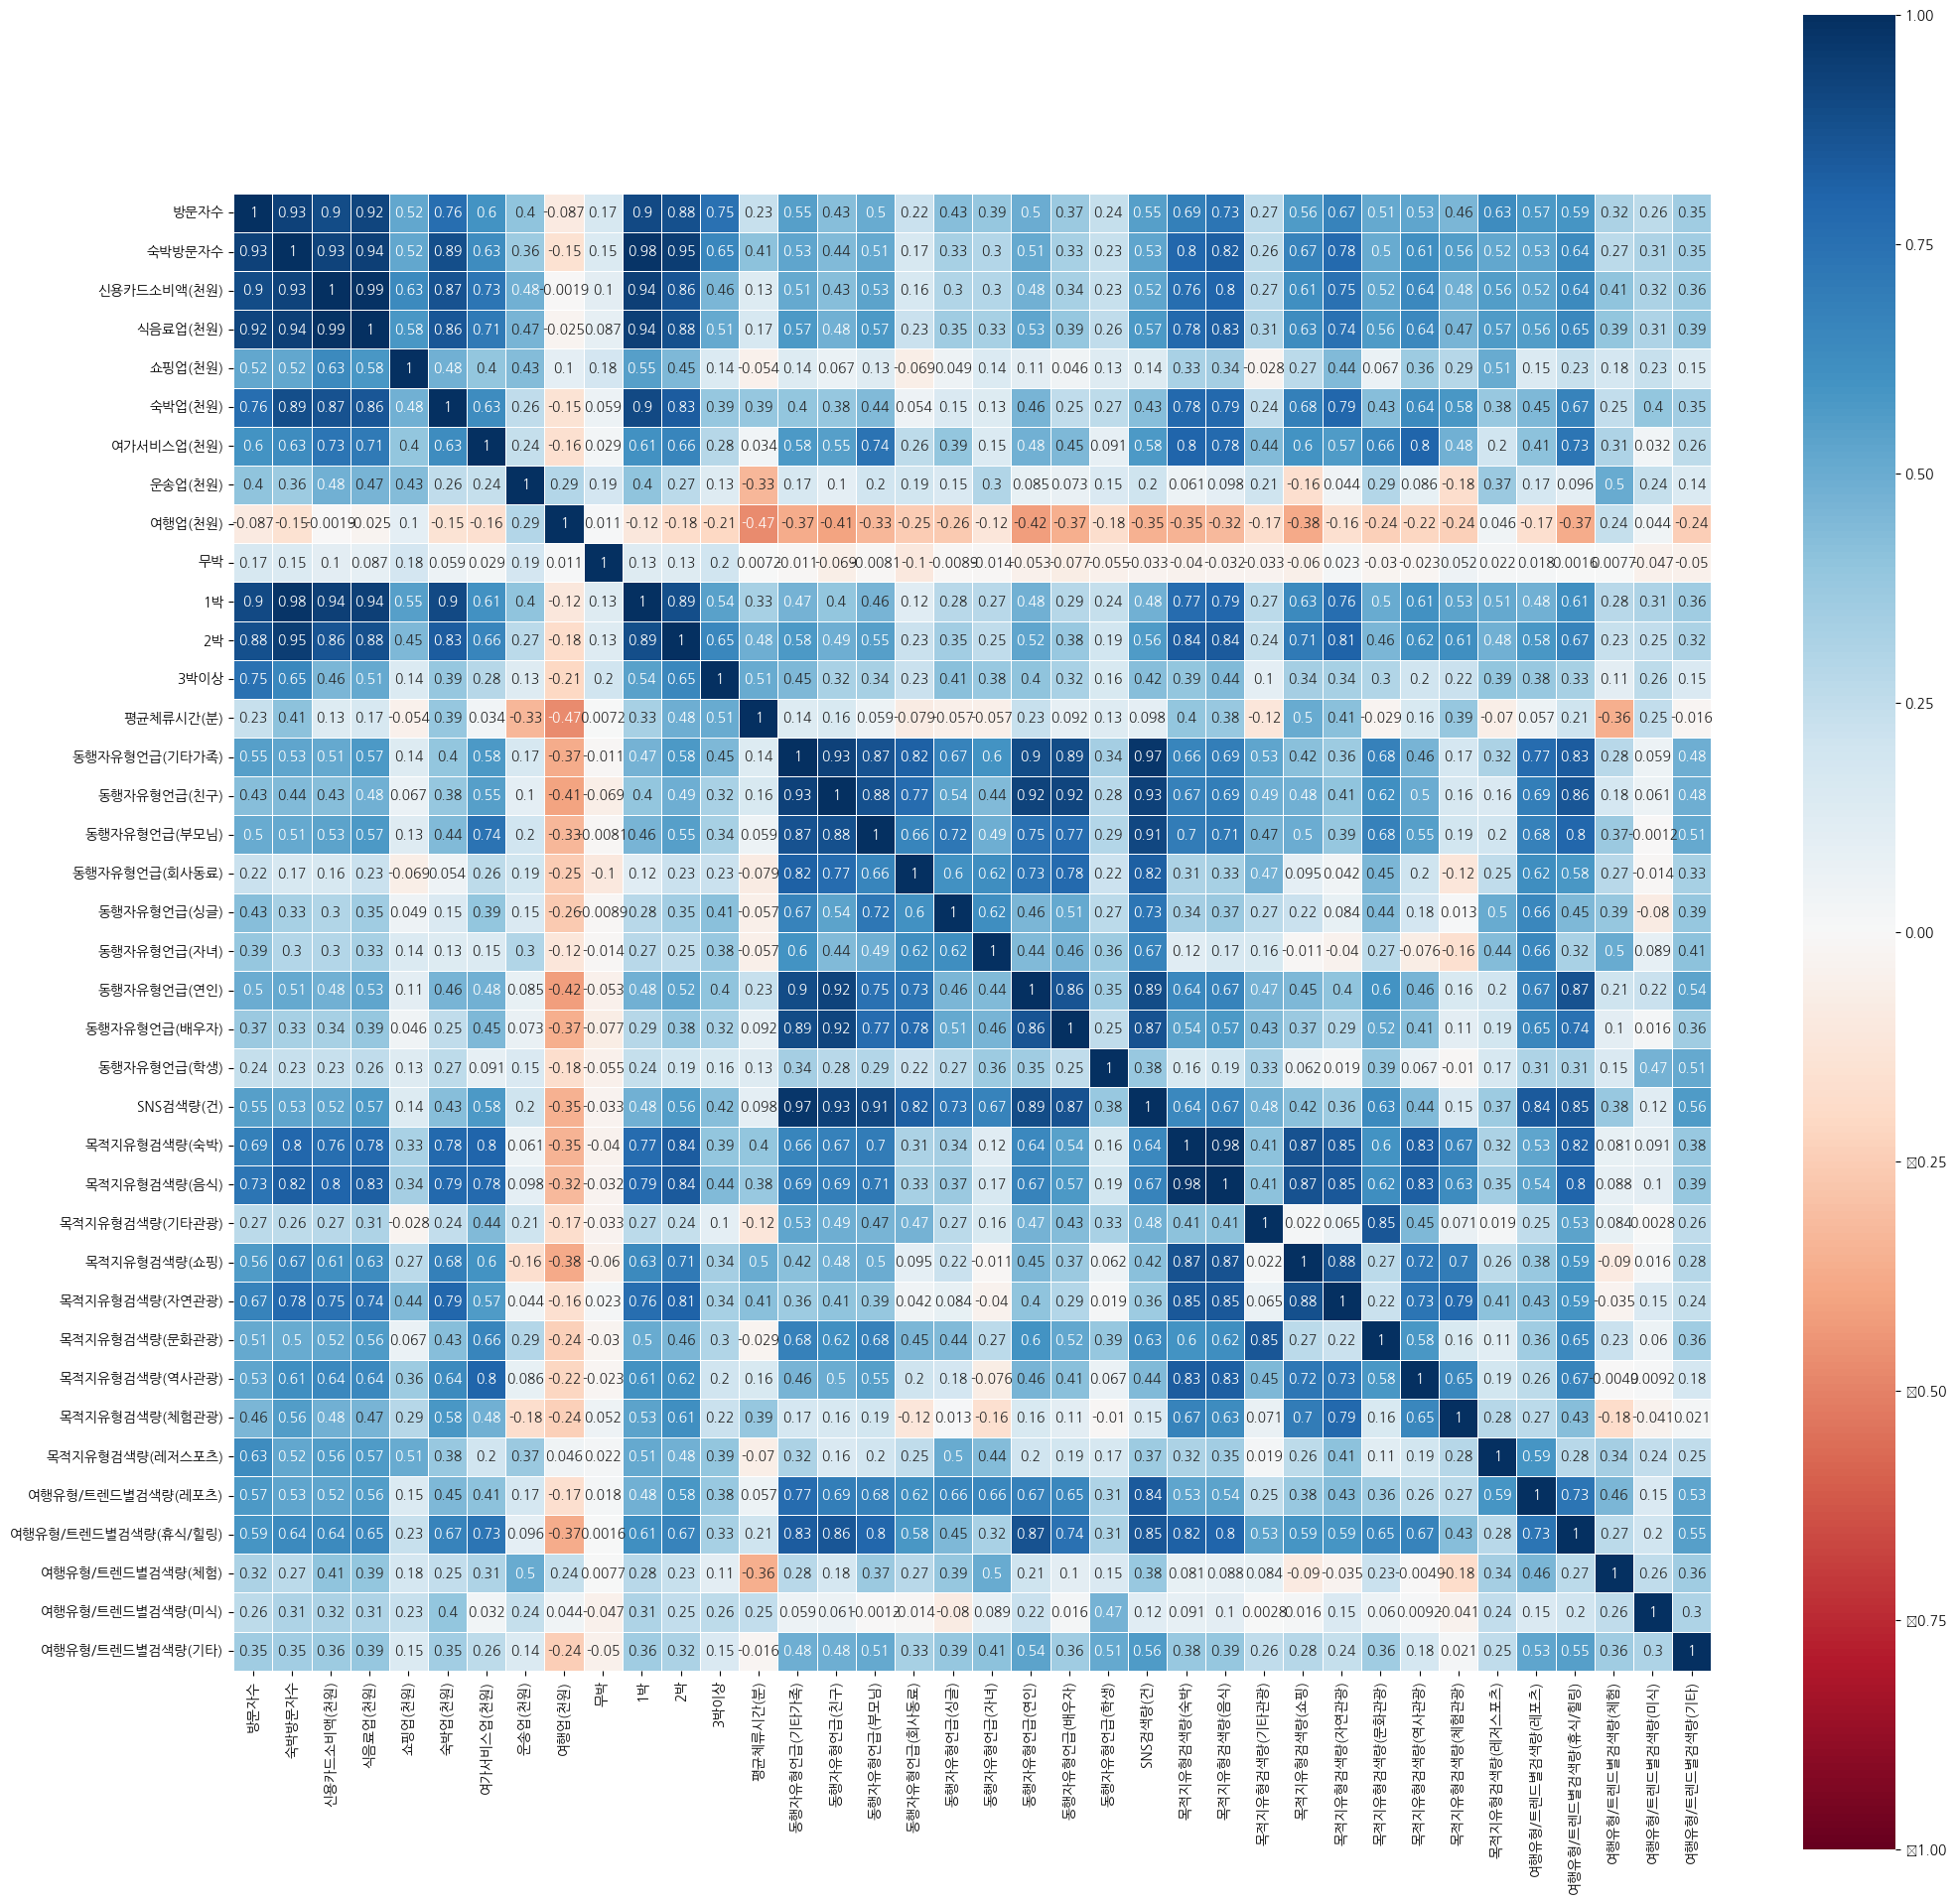

In [ ]:
fig = plt.figure(figsize=(24, 24))
ax = fig.add_subplot(1, 1, 1)

sns.heatmap(df_corr, annot=True, square=True, vmin=-1, vmax=1, linewidth=-0.5, cmap='RdBu')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 65 entries, 0 to 64
Data columns (total 39 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   기준연월                 65 non-null     object
 1   방문자수                 65 non-null     int64 
 2   숙박방문자수               65 non-null     int64 
 3   신용카드소비액(천원)          65 non-null     int64 
 4   식음료업(천원)             65 non-null     int64 
 5   쇼핑업(천원)              65 non-null     int64 
 6   숙박업(천원)              65 non-null     int64 
 7   여가서비스업(천원)           65 non-null     int64 
 8   운송업(천원)              65 non-null     int64 
 9   여행업(천원)              65 non-null     int64 
 10  무박                   65 non-null     int64 
 11  1박                   65 non-null     int64 
 12  2박                   65 non-null     int64 
 13  3박이상                 65 non-null     int64 
 14  평균체류시간(분)            65 non-null     int64 
 15  동행자유형언급(기타가족)        65 non-null     int64 
 16  동행자유형언급(친구

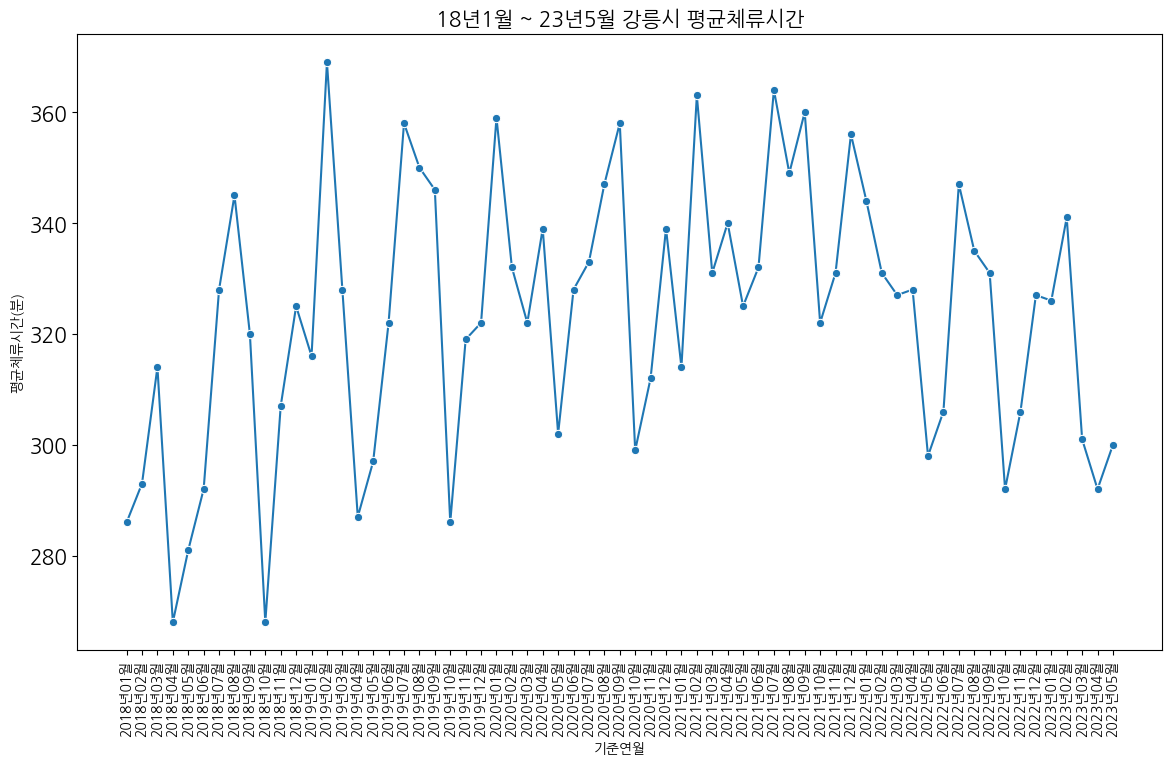

In [ ]:
fig, ax = plt.subplots(1,1, figsize=(14,8))
sns.lineplot(x='기준연월', y='평균체류시간(분)', data=df, marker = 'o')
plt.xticks(rotation = 90)
plt.title('18년1월 ~ 23년5월 강릉시 평균체류시간', fontsize=15)
plt.yticks(fontsize=15)
plt.show()

In [ ]:
data1 = pd.read_csv("/content/gdrive/MyDrive/23년 여름ai아카데미/2206-2305강릉시연령성별소비비중.csv")

In [ ]:
df1=pd.DataFrame(data=data1)
df1

,소비자 연령,남성,여성
0,10대,0.1,0.1
1,20대,6.9,7.9
2,30대,11.0,6.6
3,40대,14.7,10.0
4,50대,16.4,9.2
5,60대,8.6,5.0
6,70대,1.9,1.2
7,80대,0.3,0.1


In [ ]:
w = 0.2
nrow = df1.shape[0] # 행의 갯수
idx = np.arange(nrow) #행의 갯수를 리스트로
lb=['10대','20대','30대', '40대', '50대','60대', '70대','80대']
idx

array([0, 1, 2, 3, 4, 5, 6, 7])

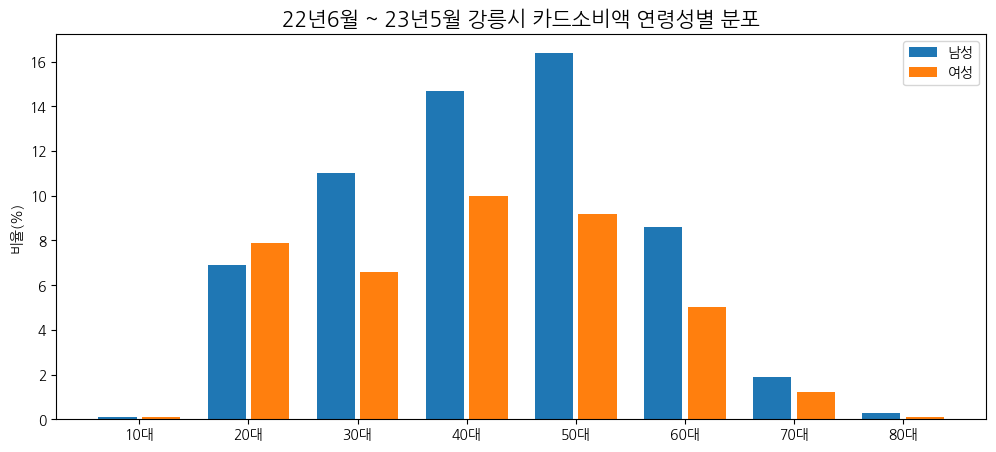

In [ ]:
plt.figure(figsize = (12, 5))
plt.bar(idx - w, df1['남성'], width=0.35, label='남성')
plt.bar(idx + w, df1['여성'], width=0.35, label='여성')
plt.xticks(idx, lb)
plt.ylabel('비율(%)')
plt.legend()
plt.title('22년6월 ~ 23년5월 강릉시 카드소비액 연령성별 분포', fontsize=15)
plt.show()

In [ ]:
data2=pd.read_csv("/content/gdrive/MyDrive/23년 여름ai아카데미/2206-2305부산해운대구소비연령성별분포.csv")

In [ ]:
df2=pd.DataFrame(data=data2)
df2

,소비자 연령,비율(남성),비율(여성)
0,80대,0.4,0.4
1,70대,1.6,2.0
2,60대,5.4,6.9
3,50대,9.6,12.2
4,40대,12.2,15.2
5,30대,11.4,12.2
6,20대,4.4,5.9
7,10대,0.1,0.1


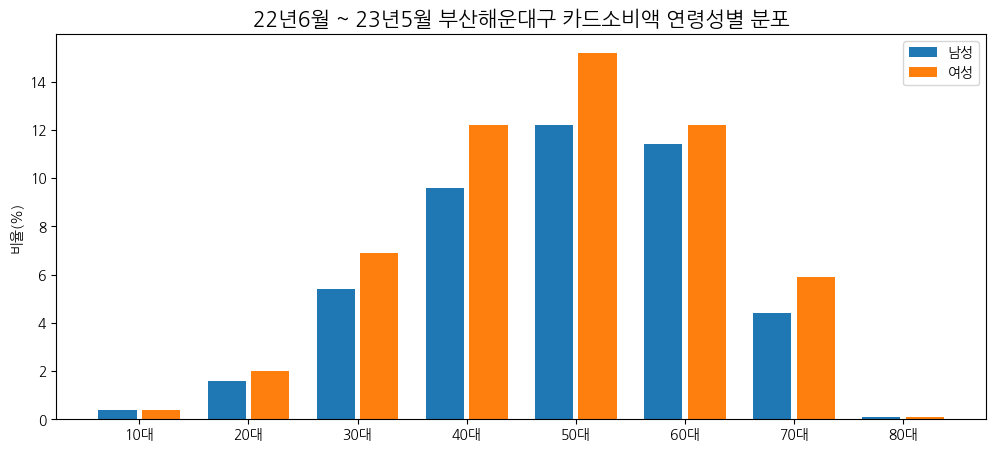

In [ ]:
plt.figure(figsize = (12, 5))
plt.bar(idx - w, df2['비율(남성)'], width=0.35, label='남성')
plt.bar(idx + w, df2['비율(여성)'], width=0.35, label='여성')
plt.xticks(idx, lb,)
plt.ylabel('비율(%)')
plt.legend()
plt.title('22년6월 ~ 23년5월 부산해운대구 카드소비액 연령성별 분포', fontsize=15)
plt.show()

In [ ]:
data3=pd.read_csv("/content/gdrive/MyDrive/23년 여름ai아카데미/2206-2305부산해운대구관광지검색수.csv")
df3=pd.DataFrame(data=data3)
df3.head(10)

,순위,관광지명,주소,분류,외지인 검색 수
0,1,신세계백화점센텀시티점,부산 해운대구 센텀남대로 35-0,백화점,470789
1,2,해운대해수욕장,부산 해운대구 해운대해변로 264-0,자연경관(하천/해양),225578
2,3,송정해수욕장,부산 해운대구 송정해변로 62-0,자연경관(하천/해양),191216
3,4,벡스코제1전시장,부산 해운대구 APEC로 55-0,전시시설,165322
4,5,파라다이스호텔부산,부산 해운대구 해운대해변로 296-0,호텔,88342
5,6,한화리조트해운대,부산 해운대구 마린시티3로 52-0,콘도미니엄,82363
6,7,신세계센텀시티몰,부산 해운대구 센텀4로 15-0,백화점,76944
7,8,반여농산물도매시장,부산 해운대구 수영강변대로 626-0,시장,75903
8,9,해운대블루라인파크미포정거장,부산 해운대구 달맞이길62번길 13-0,기타관광,66818
9,10,롯데백화점센텀시티점,부산 해운대구 센텀남대로 59-0,백화점,58323


In [ ]:
df3=df3.iloc[:10,:]
df3

,순위,관광지명,주소,분류,외지인 검색 수
0,1,신세계백화점센텀시티점,부산 해운대구 센텀남대로 35-0,백화점,470789
1,2,해운대해수욕장,부산 해운대구 해운대해변로 264-0,자연경관(하천/해양),225578
2,3,송정해수욕장,부산 해운대구 송정해변로 62-0,자연경관(하천/해양),191216
3,4,벡스코제1전시장,부산 해운대구 APEC로 55-0,전시시설,165322
4,5,파라다이스호텔부산,부산 해운대구 해운대해변로 296-0,호텔,88342
5,6,한화리조트해운대,부산 해운대구 마린시티3로 52-0,콘도미니엄,82363
6,7,신세계센텀시티몰,부산 해운대구 센텀4로 15-0,백화점,76944
7,8,반여농산물도매시장,부산 해운대구 수영강변대로 626-0,시장,75903
8,9,해운대블루라인파크미포정거장,부산 해운대구 달맞이길62번길 13-0,기타관광,66818
9,10,롯데백화점센텀시티점,부산 해운대구 센텀남대로 59-0,백화점,58323


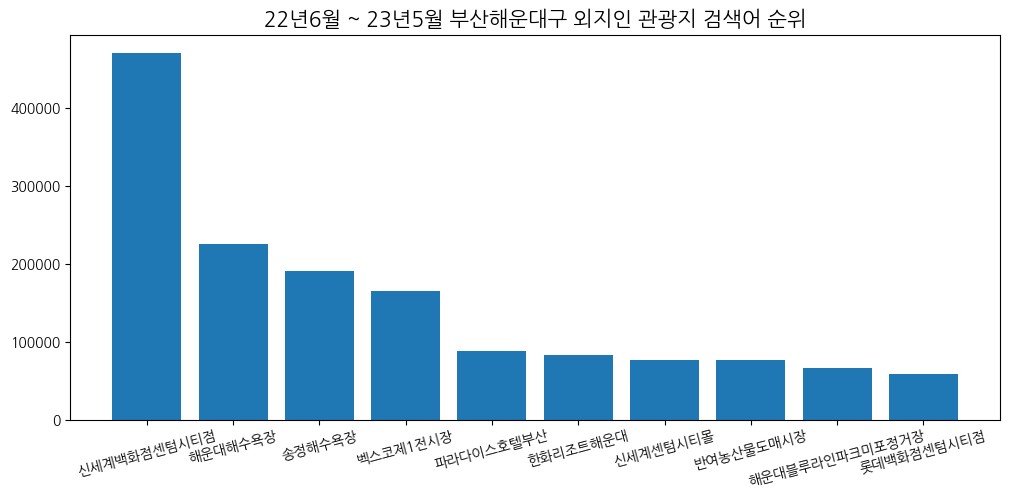

In [ ]:
fig,ax=plt.subplots(1,1,figsize=(12,5))

ax=plt.bar(df3['관광지명'], df3['외지인 검색 수'])
plt.xticks(rotation=15)
plt.title('22년6월 ~ 23년5월 부산해운대구 외지인 관광지 검색어 순위', fontsize=15)
plt.show()

In [ ]:
data4 = pd.read_csv('/content/gdrive/MyDrive/23년 여름ai아카데미/부산.csv')
df4=pd.DataFrame(data=data4)
df4

,Unnamed: 0,신용카드 소비액(천원),쇼핑업(천원),식음료업(천원),숙박업(천원),여가서비스업(천원),운송업(천원),여행업(천원)
0,202206,60991449,36728385,17188479,5386751,1441322,243473,3039
1,202207,60943275,32849501,19670601,6581405,1598813,213572,29383
2,202208,61456367,31712342,20927764,6813280,1711313,291169,498
3,202209,49459740,29566241,14173008,4321166,1206272,179282,13770
4,202210,57474232,34127475,16891328,4893251,1125822,433668,2688
5,202211,50619855,30441951,14885621,4019048,1013880,241352,18003
6,202212,56750486,33788389,16796246,4947854,1132141,85857,0
7,202301,51722307,30406492,15476639,4578884,1162900,96301,1090
8,202302,51077471,29447748,15608150,4907117,965980,128406,20071
9,202303,49359581,30371631,14246795,3620322,910290,156581,53962


In [ ]:
df4=df4.astype({'Unnamed: 0':str})
df4.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12 entries, 0 to 11
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Unnamed: 0    12 non-null     object
 1   신용카드 소비액(천원)  12 non-null     int64 
 2   쇼핑업(천원)       12 non-null     int64 
 3   식음료업(천원)      12 non-null     int64 
 4   숙박업(천원)       12 non-null     int64 
 5   여가서비스업(천원)    12 non-null     int64 
 6   운송업(천원)       12 non-null     int64 
 7   여행업(천원)       12 non-null     int64 
dtypes: int64(7), object(1)
memory usage: 896.0+ bytes


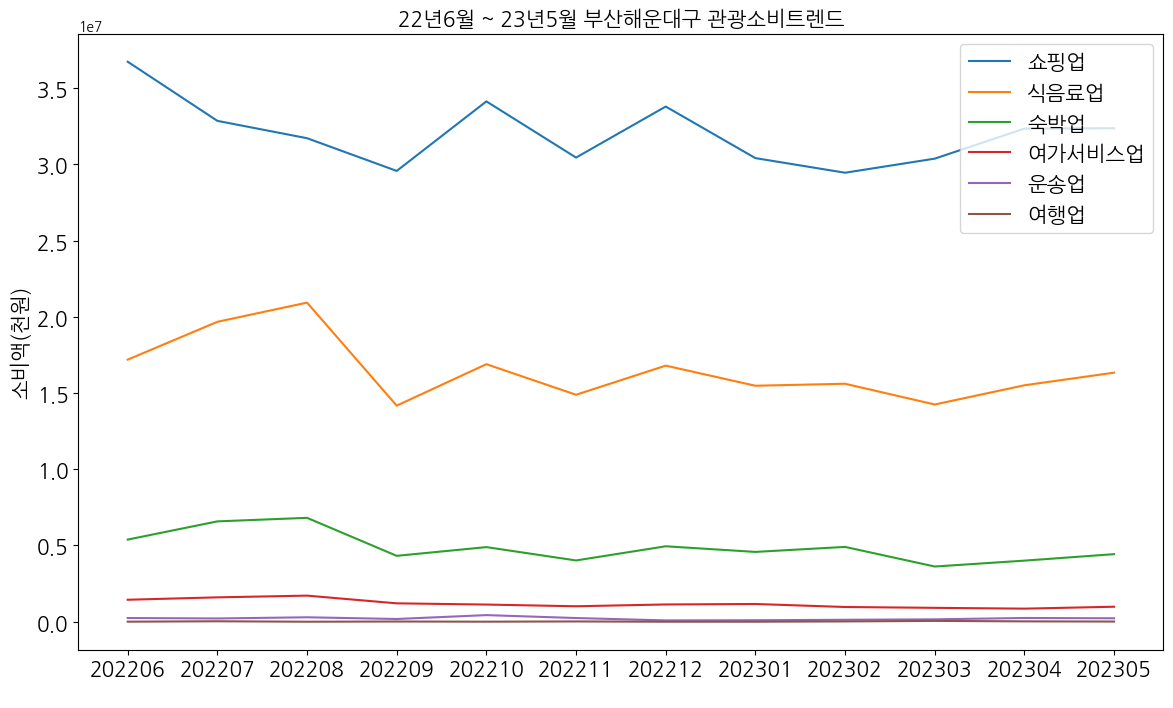

In [ ]:
fig, ax = plt.subplots(1,1,figsize=(14,8))

ax=sns.lineplot(x='Unnamed: 0', y='쇼핑업(천원)', data=df4, label='쇼핑업')
ax=sns.lineplot(x='Unnamed: 0', y='식음료업(천원)', data=df4, label='식음료업')
ax=sns.lineplot(x='Unnamed: 0', y='숙박업(천원)', data=df4, label='숙박업')
ax=sns.lineplot(x='Unnamed: 0', y='여가서비스업(천원)', data=df4, label='여가서비스업')
ax=sns.lineplot(x='Unnamed: 0', y='운송업(천원)', data=df4, label='운송업')
ax=sns.lineplot(x='Unnamed: 0', y='여행업(천원)', data=df4, label='여행업')
plt.ylabel('소비액(천원)',fontsize=15)
plt.xlabel(' ')
plt.yticks(fontsize=15)
plt.xticks(fontsize=15)
plt.title('22년6월 ~ 23년5월 부산해운대구 관광소비트렌드', fontsize=15)
plt.legend(fontsize=15)
plt.show()

In [ ]:
data5=pd.read_csv("/content/gdrive/MyDrive/23년 여름ai아카데미/20230713114437_방문자 성연령별 분포.csv")  #강릉방문자
df5=pd.DataFrame(data=data5)
df5=df5.reindex(index=[7,6,5,4,3,2,1,0])
df5

,방문자 연령,방문자 비율(남성),방문자 비율(여성)
7,0~9세,0.6,0.7
6,10~19세,3.2,3.0
5,20~29세,11.2,11.4
4,30~39세,8.8,7.8
3,40~49세,8.9,7.0
2,50~59세,9.6,8.4
1,60~69세,7.4,6.2
0,70세 이상,2.8,3.0


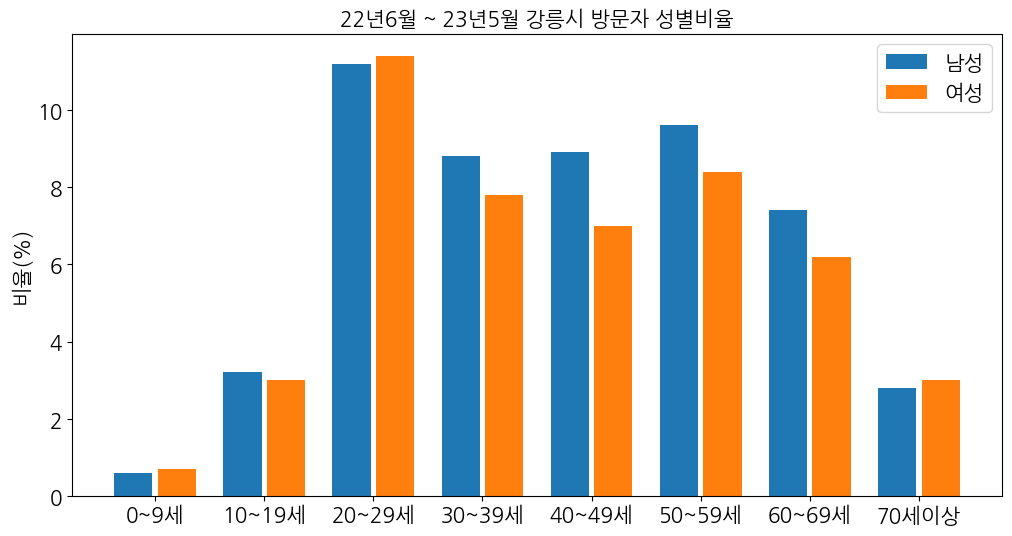

In [ ]:
fig, ax = plt.subplots(1,1, figsize=(12,6))

ax=plt.bar(idx-0.2, df5['방문자 비율(남성)'], width=0.35, label='남성')
ax=plt.bar(idx+0.2, df5['방문자 비율(여성)'], width=0.35, label='여성')
plt.title('22년6월 ~ 23년5월 강릉시 방문자 성별비율', fontsize=15)
plt.legend(fontsize=15)
plt.ylabel("비율(%)", fontsize=15)
plt.yticks(fontsize=15)
plt.xticks(idx, ['0~9세','10~19세','20~29세','30~39세','40~49세','50~59세','60~69세','70세이상'], fontsize=15)
plt.show()

In [ ]:
data6=pd.read_csv("/content/gdrive/MyDrive/23년 여름ai아카데미/20230713114453_방문자 성연령별 분포.csv")   #해운대구방문자
df6=pd.DataFrame(data=data6)
df6=df6.reindex(index=[7,6,5,4,3,2,1,0])
df6

,방문자 연령,방문자 비율(남성),방문자 비율(여성)
7,0~9세,0.5,0.5
6,10~19세,2.9,2.9
5,20~29세,9.9,10.4
4,30~39세,10.1,8.7
3,40~49세,9.2,7.4
2,50~59세,8.9,7.9
1,60~69세,8.3,6.1
0,70세 이상,3.5,2.8


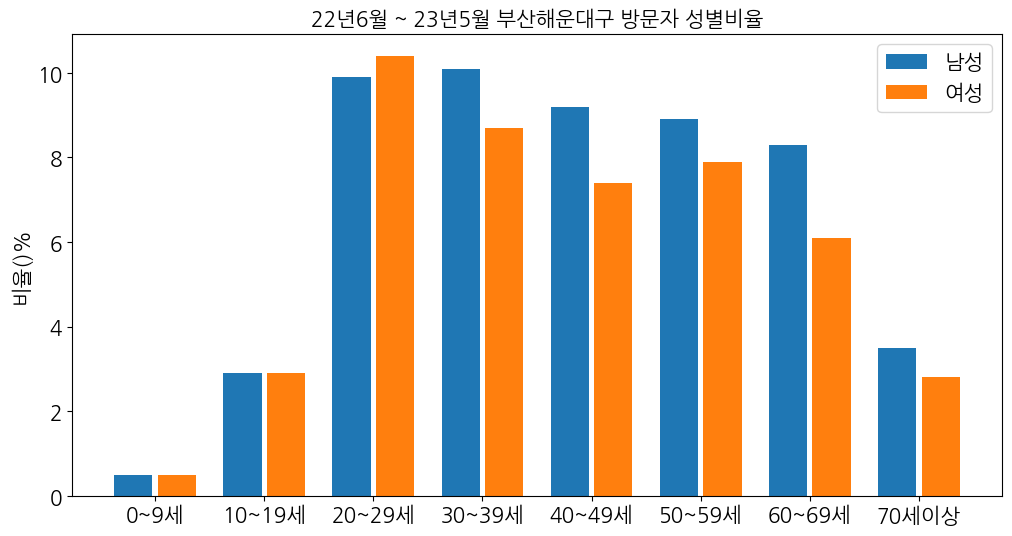

In [ ]:
fig,ax=plt.subplots(1,1,figsize=(12,6))

ax=plt.bar(idx-0.2, df6['방문자 비율(남성)'], width=0.35, label='남성')
ax=plt.bar(idx+0.2, df6['방문자 비율(여성)'], width=0.35, label='여성')
plt.legend(fontsize=15)
plt.xticks(idx, ['0~9세','10~19세','20~29세','30~39세','40~49세','50~59세','60~69세','70세이상'], fontsize=15)
plt.yticks(fontsize=15)
plt.ylabel('비율()%', fontsize=15)
plt.title('22년6월 ~ 23년5월 부산해운대구 방문자 성별비율', fontsize=15)
plt.show()